# Movie Rating Prediction


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Importing Movie datase

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

### Exploring Dataset

In [3]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### Understanding and Preprocessing Data

In [7]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], 
                       axis=1, 
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


In [8]:
# To convert Duration into numeric and fill null values 

df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

In [9]:
df.isnull().sum()

Name           0
Year         528
Duration       0
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.shape

(15509, 10)

In [11]:
# To drop duplicates

df.drop_duplicates(inplace=True)
df.shape

(15503, 10)

In [12]:
# To drop rows containg null value
df.dropna(inplace=True)
df.shape

(7558, 10)

In [13]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [14]:
# To remove parethesis from Year Column
df['Year'] = df['Year'].str.strip('()').astype(int)

# To remove comma from Votes Column
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [15]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### Data Visualization

In [16]:
sns.set_palette("Pastel1_r")

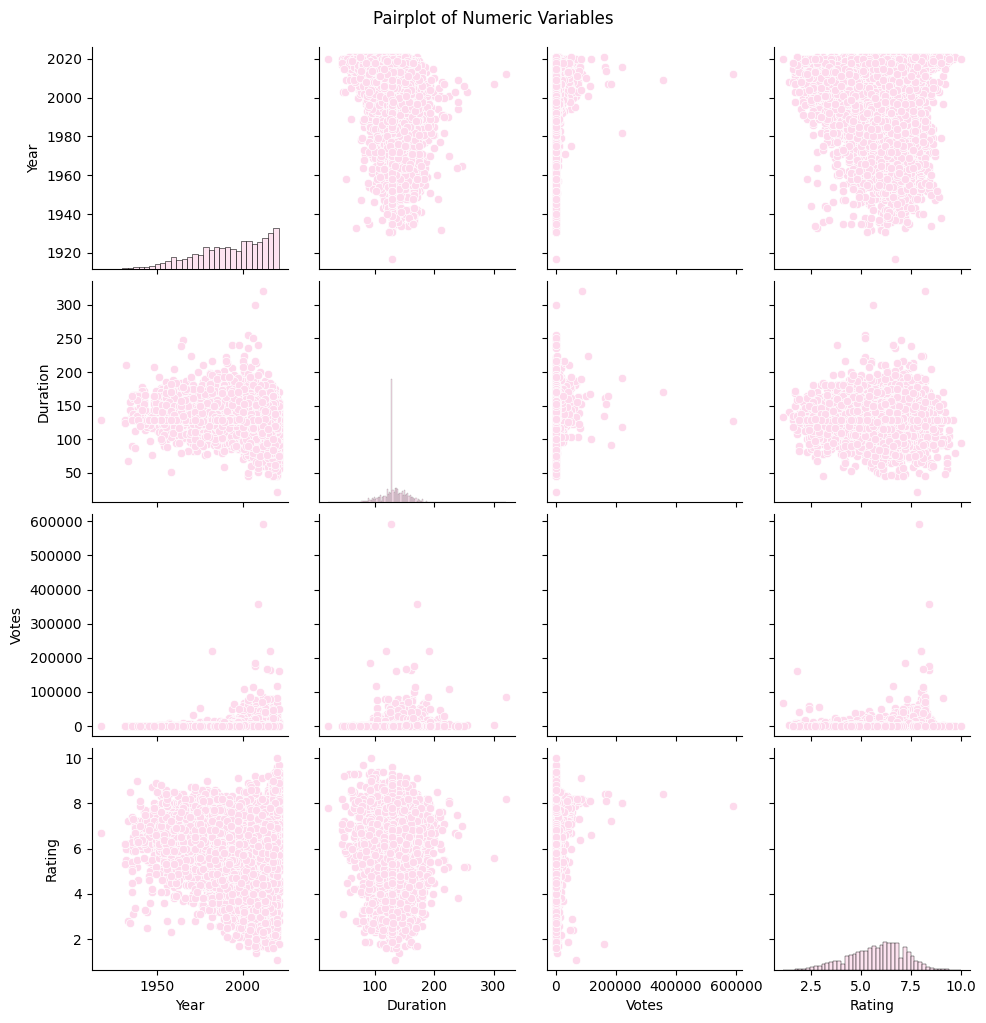

In [17]:
sns.pairplot(df[['Year', 'Duration', 'Votes', 'Rating']])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


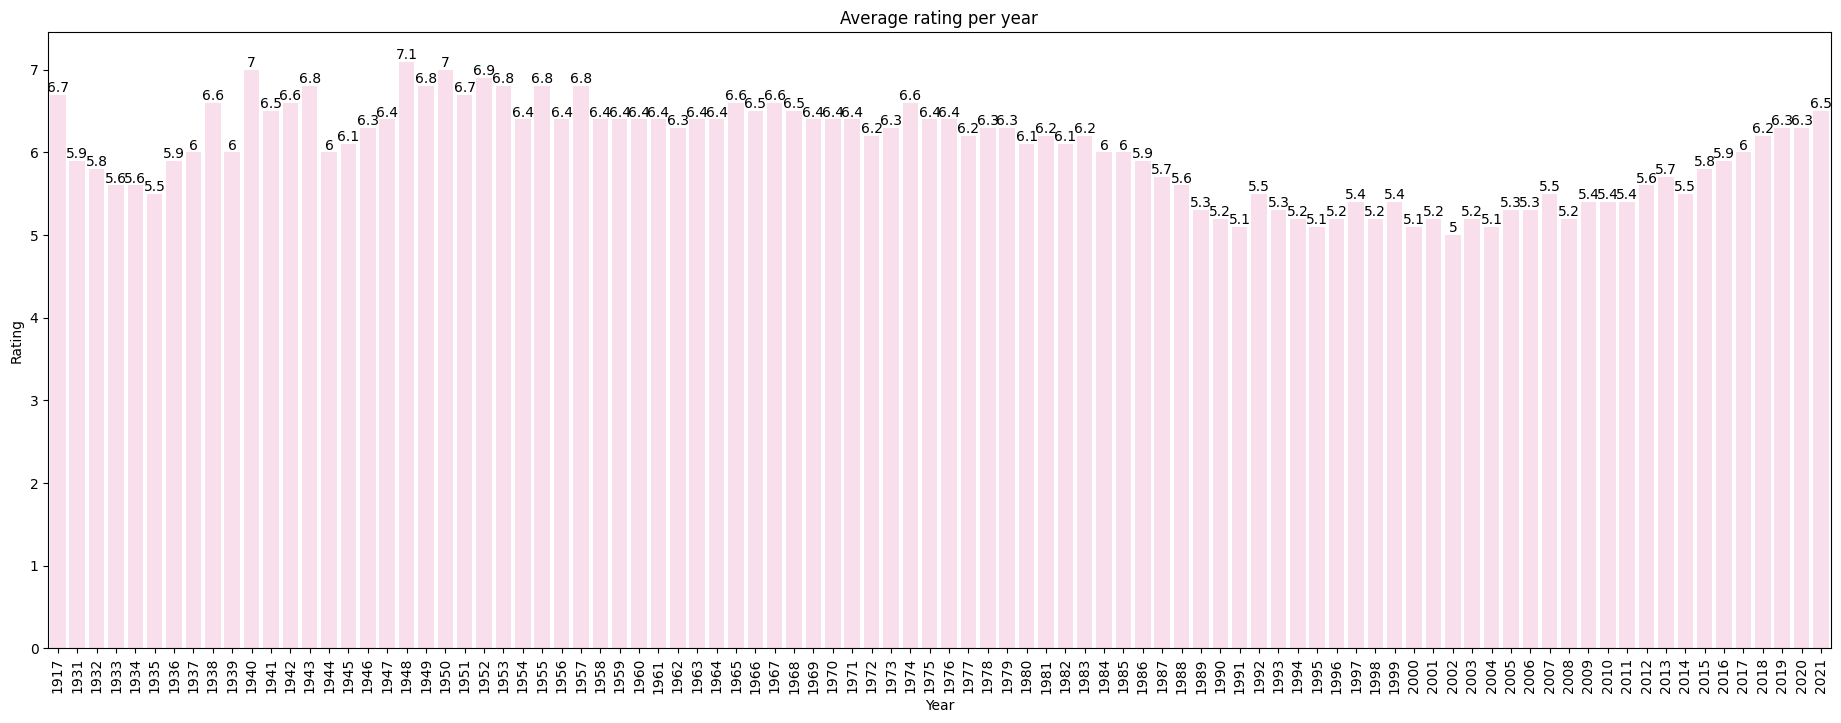

In [18]:
# Average rating per year

year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(23,8))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

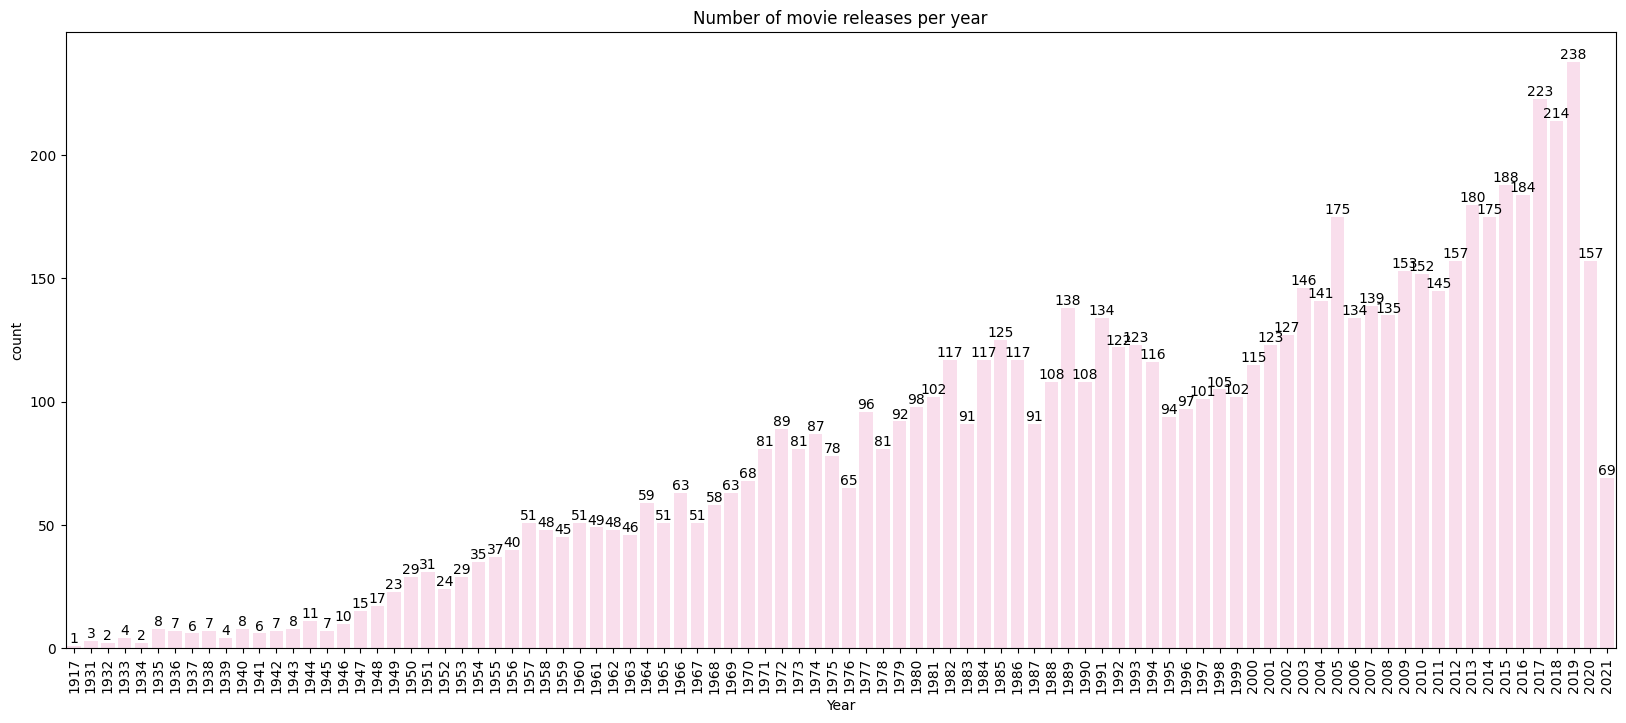

In [19]:
# Number of movie release per year

year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

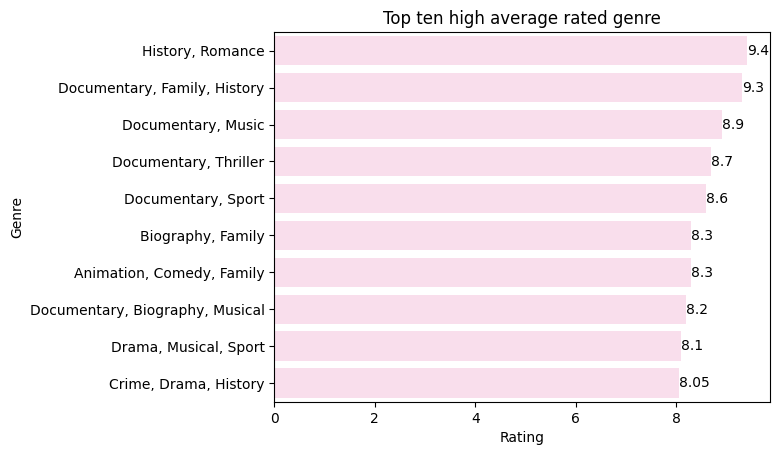

In [20]:
# plotting top ten high average rated genre 

genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

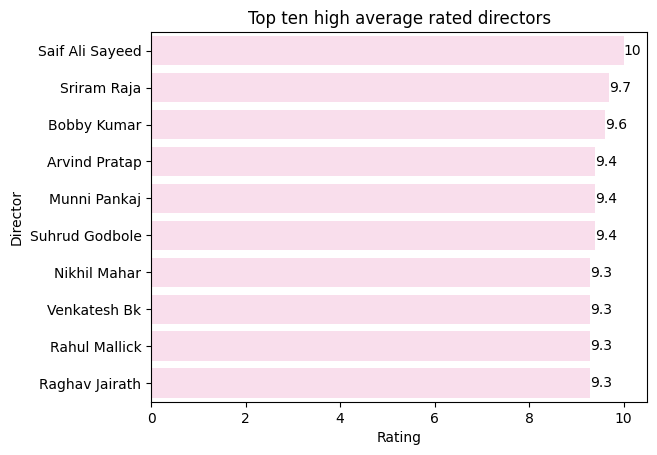

In [21]:
# plotting top ten high average rating directors

director_rate = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=director_rate, x='Rating', y='Director')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated directors')
plt.show()

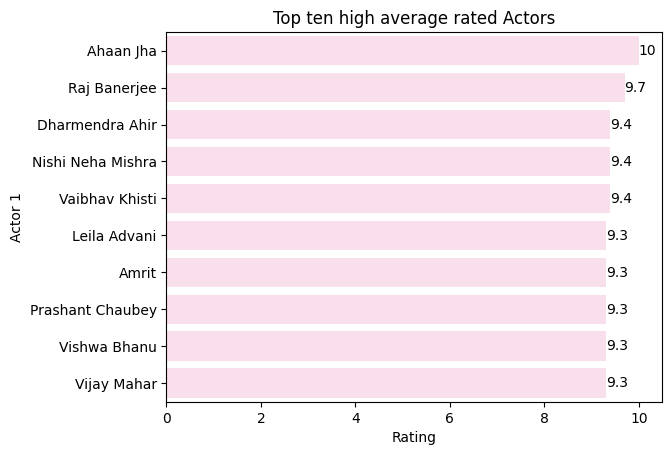

In [22]:
# plotting top ten high average rating actors

actor1_rate = df.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=actor1_rate, x='Rating', y='Actor 1')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated Actors')
plt.show()


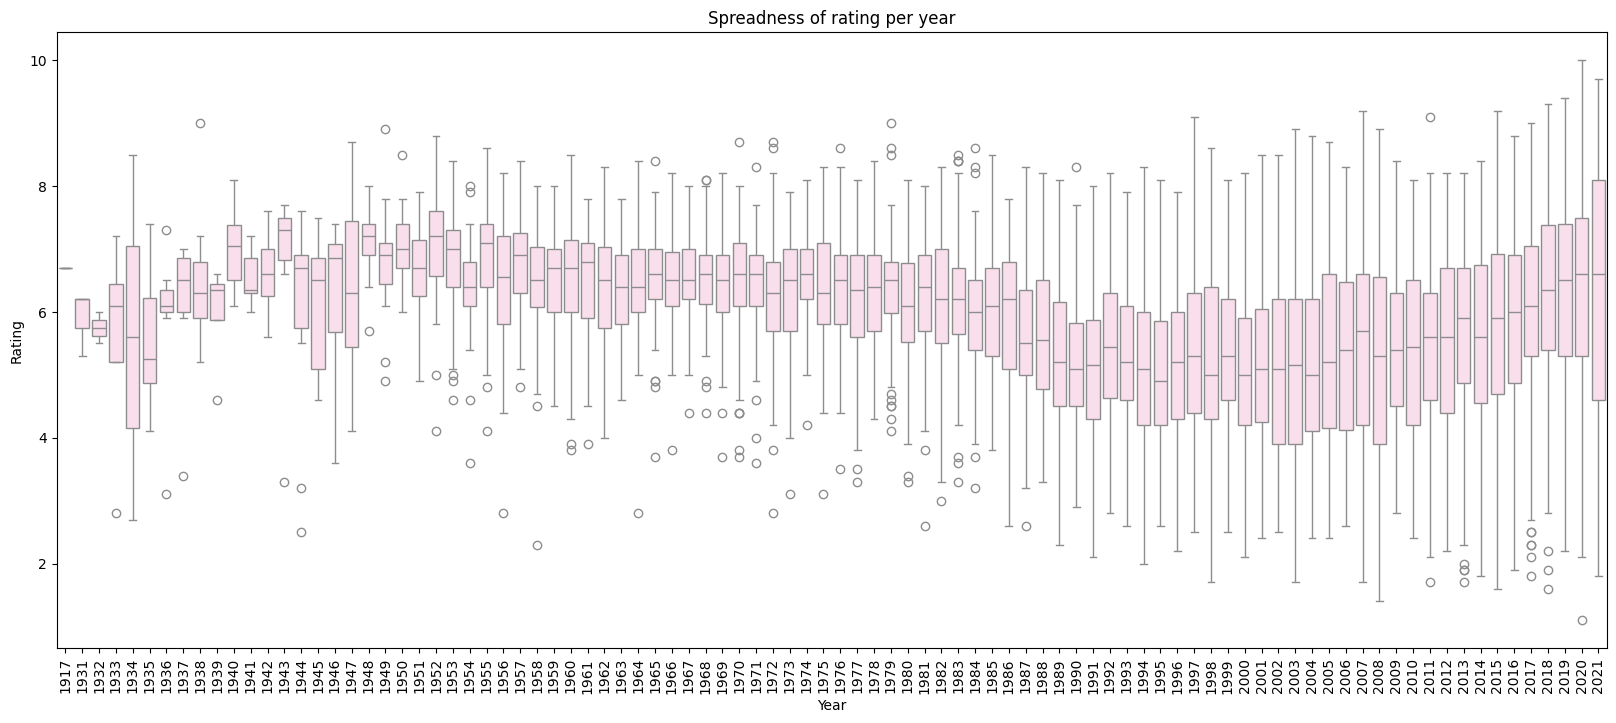

In [23]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Year', y='Rating')
plt.title('Spreadness of rating per year')
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

In [24]:
df_update = df.drop(['Name'], axis=1)

In [25]:
df_update.head(10)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,2014,116.0,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,2004,96.0,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,2016,120.0,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,1991,161.0,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,2012,166.0,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [26]:
# Target Encoding
actor1_encoding_map = df_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = df_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = df_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = df_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = df_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()
df_update['actor1_encoded'] = round(df_update['Actor 1'].map(actor1_encoding_map['Rating']), 1)
df_update['actor2_encoded'] = round(df_update['Actor 2'].map(actor2_encoding_map['Rating']), 1)
df_update['actor3_encoded'] = round(df_update['Actor 3'].map(actor3_encoding_map['Rating']), 1)
df_update['director_encoded'] = round(df_update['Director'].map(director_encoding_map['Rating']), 1)
df_update['genre_encoded'] = round(df_update['Genre'].map(genre_encoding_map['Rating']), 1)
df_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

In [27]:
df_update.head(10)

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5
9,2014,116.0,4.0,11,4.0,4.6,4.0,4.0,5.3
10,2004,96.0,6.2,17,5.2,5.4,5.2,6.2,6.3
11,2016,120.0,5.9,59,5.8,5.9,5.9,7.0,4.6
12,1991,161.0,6.5,983,5.1,5.8,5.2,4.8,5.4
13,2012,166.0,5.7,512,6.3,5.7,5.7,5.7,5.7


### Model Training

In [28]:
# Train-Test Split
features = df_update.drop(['Rating'], axis=1)
target = df_update['Rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

### Model Evaluation

In [30]:
def evaluate_model(predictions, actual_values, model_name):
    r2 = r2_score(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    print(f"{model_name} - R2 Score: {r2:.4f}")
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    print(f"{model_name} - Root Mean Squared Error: {rmse:.4f}")

# Evaluating Linear Regression Model
evaluate_model(linear_reg_pred, y_test, "Linear Regression")

# Evaluating Random Forest Model
evaluate_model(random_forest_pred, y_test, "Random Forest")

Linear Regression - R2 Score: 0.7582
Linear Regression - Mean Squared Error: 0.4479
Linear Regression - Root Mean Squared Error: 0.6693
Random Forest - R2 Score: 0.7948
Random Forest - Mean Squared Error: 0.3803
Random Forest - Root Mean Squared Error: 0.6167


### Visualization of Actual and Predicted Rating

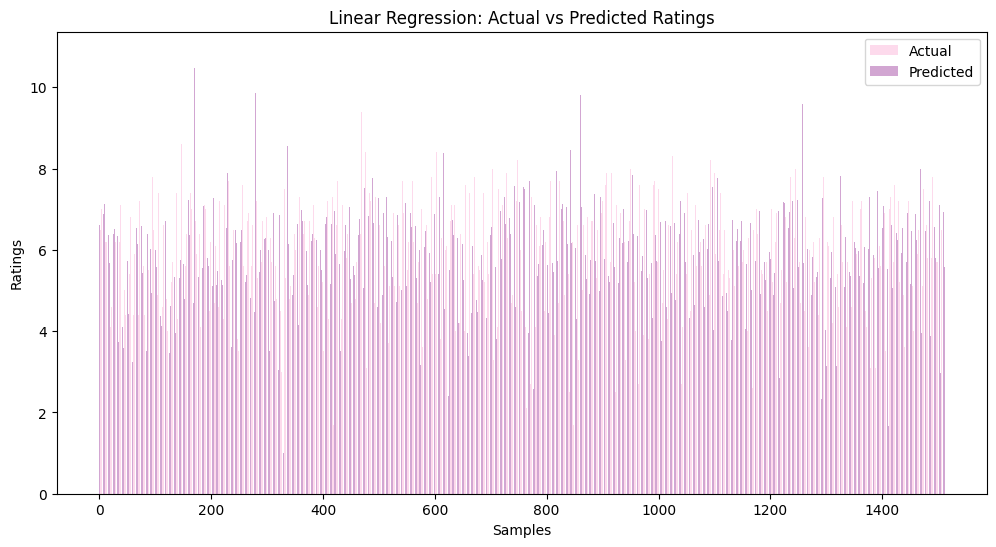

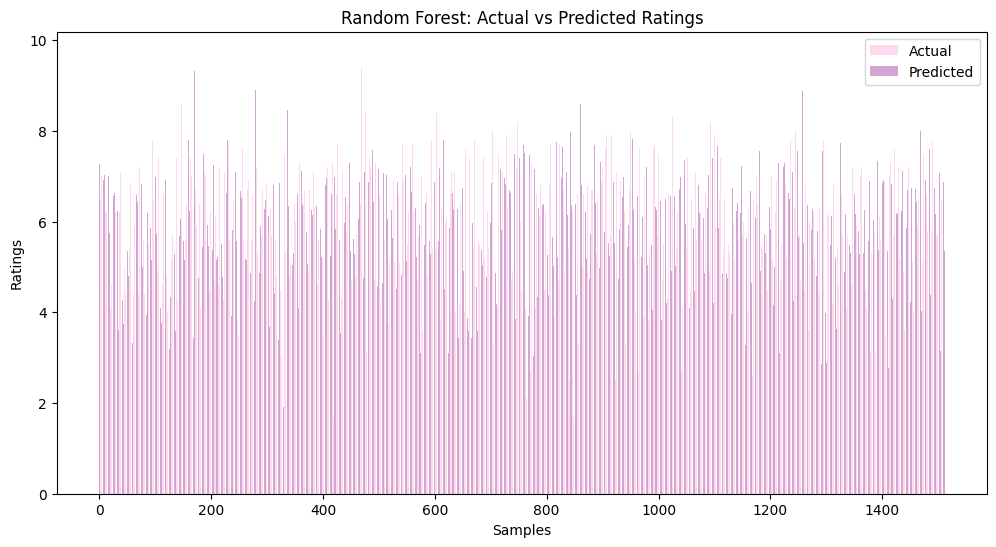

In [31]:
def plot_actual_vs_predicted(actual_values, predicted_values, model_name):
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(len(actual_values)), actual_values, width=0.4, label='Actual')
    plt.bar(np.arange(len(predicted_values)) + 0.4, predicted_values, width=0.4, label='Predicted',color="purple",alpha=0.35)
    plt.title(f'{model_name}: Actual vs Predicted Ratings')
    plt.xlabel('Samples')
    plt.ylabel('Ratings')
    plt.legend()
    plt.show()

# Bar Plot for Linear Regression
plot_actual_vs_predicted(y_test, linear_reg_pred, "Linear Regression")

# Bar Plot for Random Forest
plot_actual_vs_predicted(y_test, random_forest_pred, "Random Forest")


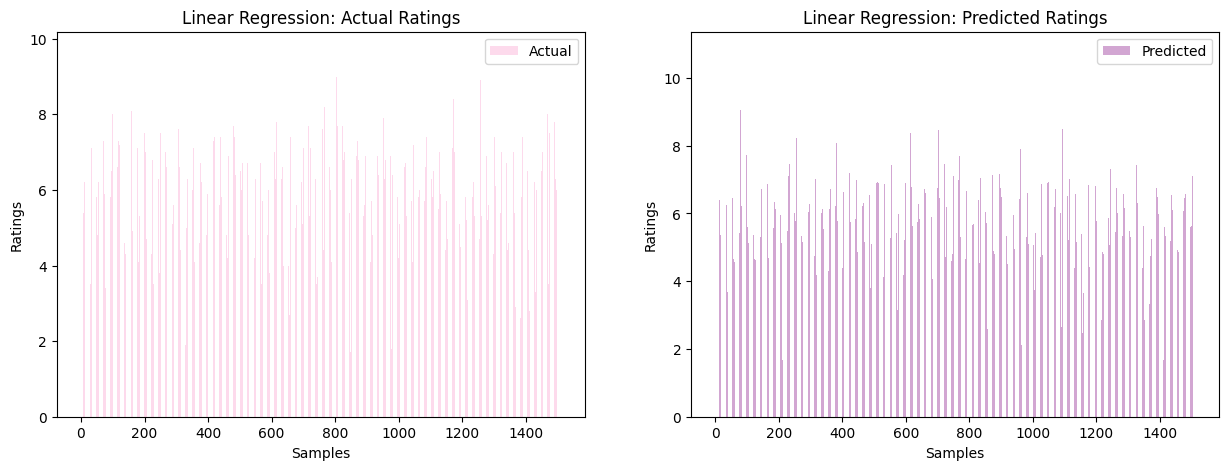

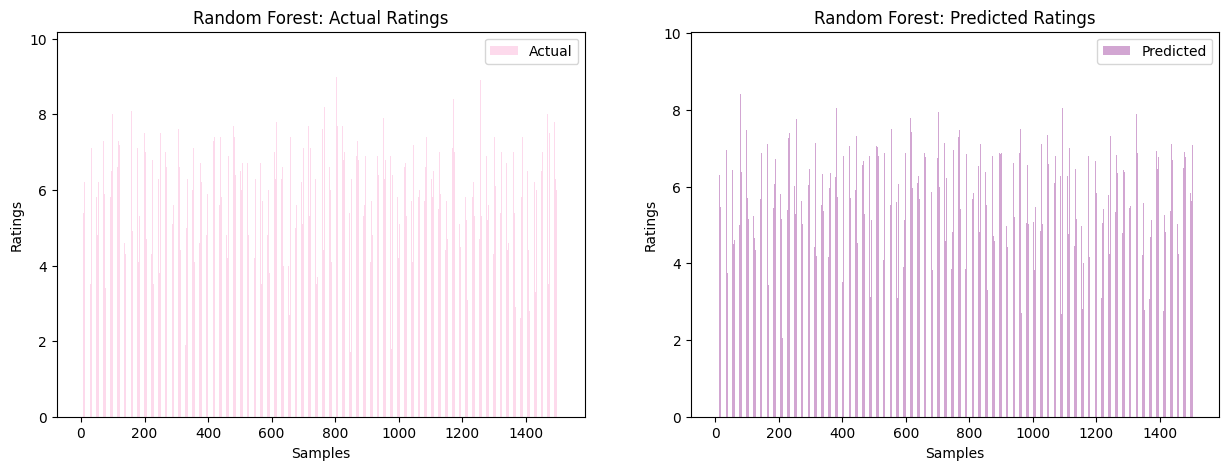

In [32]:
def plot_actual_vs_predicted_subplots(actual_values, predicted_values, model_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Bar Plot for Actual Ratings
    axes[0].bar(np.arange(len(actual_values)), actual_values, width=0.4, label='Actual')
    axes[0].set_title(f'{model_name}: Actual Ratings')
    axes[0].set_xlabel('Samples')
    axes[0].set_ylabel('Ratings')
    axes[0].legend()

    # Bar Plot for Predicted Ratings
    axes[1].bar(np.arange(len(predicted_values)), predicted_values, width=0.4, label='Predicted',color="purple",alpha=0.35)
    axes[1].set_title(f'{model_name}: Predicted Ratings')
    axes[1].set_xlabel('Samples')
    axes[1].set_ylabel('Ratings')
    axes[1].legend()

    plt.show()

# Subplots for Linear Regression
plot_actual_vs_predicted_subplots(y_test, linear_reg_pred, "Linear Regression")

# Subplots for Random Forest
plot_actual_vs_predicted_subplots(y_test, random_forest_pred, "Random Forest")


### Prediction on input data

In [33]:
# Input for Prediction
input_data = {
    'Year': [2023],
    'Duration': [120],
    'Votes': [100000],
    'actor1_encoded': [8.2],
    'actor2_encoded': [7.8],
    'actor3_encoded': [7.5],
    'director_encoded': [8.0],
    'genre_encoded': [7.9]
}

input_df = pd.DataFrame(input_data)

# Making Predictions on Input Data using trained models
linear_reg_prediction = linear_reg_model.predict(input_df)[0]
random_forest_prediction = random_forest_model.predict(input_df)[0]

print(f"Linear Regression Prediction for the input data: {linear_reg_prediction:.2f}")
print(f"Random Forest Prediction for the input data: {random_forest_prediction:.2f}")

Linear Regression Prediction for the input data: 9.14
Random Forest Prediction for the input data: 8.04
